<a href="https://colab.research.google.com/github/Swethashankar03/-cognifyztechnologies/blob/main/cognify_datascience_tasks_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL 1**
## **TASK** -1
Task: Data Exploration and Preprocessing

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.




---







Dataset Shape (Rows, Columns): (9551, 21)

First 5 rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Ma

<ipython-input-3-9eb9f5d98061>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-3-9eb9f5d98061>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

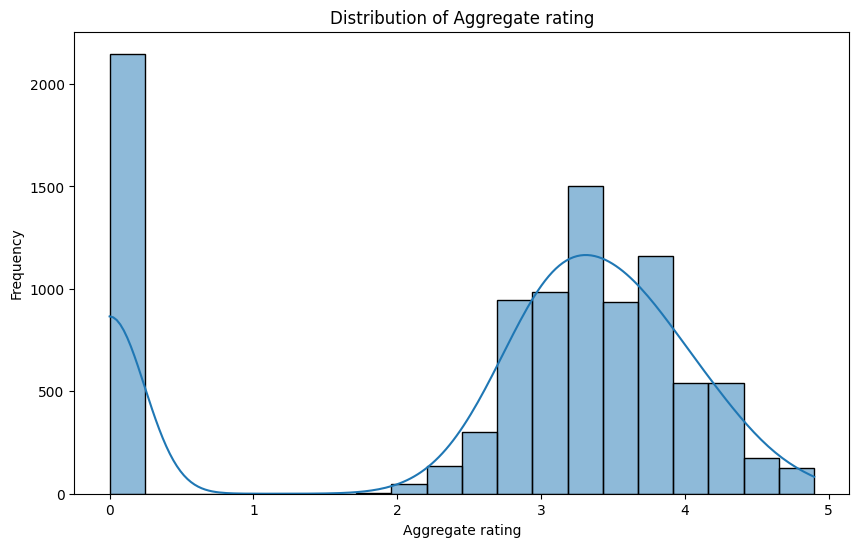


Class distribution (proportion):
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3    0.018218
4.4    0.015077
2.5    0.011517
4.5    0.009947
2.4    0.009109
4.6    0.008167
4.9    0.006387
2.3    0.004921
4.7    0.004397
2.2    0.002827
4.8    0.002618
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = ("/content/sample_data/Dataset .csv")
data = pd.read_csv(file_path)

# 1. Explore the dataset
print("Dataset Shape (Rows, Columns):", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

# 2. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values
for column in data.columns:
    if data[column].dtype in ["int64", "float64"]:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())

# 3. Perform data type conversion if necessary
print("\nData types before conversion:")
print(data.dtypes)

for column in data.columns:
    if data[column].dtype == "object":
        data[column] = data[column].astype("category")

print("\nData types after conversion:")
print(data.dtypes)

# 4. Analyze the target variable
target_column = "Aggregate rating"
if target_column in data.columns:
    print(f"\nDistribution of target variable '{target_column}':")
    print(data[target_column].value_counts())

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data[target_column], kde=True, bins=20)
    plt.title(f"Distribution of {target_column}")
    plt.xlabel(target_column)
    plt.ylabel("Frequency")
    plt.show()

    # Check for class imbalance (if categorical or discrete target)
    imbalance = data[target_column].value_counts(normalize=True)
    print("\nClass distribution (proportion):")
    print(imbalance)
else:
    print(f"\nTarget variable '{target_column}' not found in the dataset.")



#**TASK -2**
Task: Descriptive Analysis

Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns. Explore the distribution of categorical
variables like "Country Code," "City," and "Cuisines"Identify the top
cuisines and cities with the highest number of restaurants.



---



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Dataset .csv')

# Basic statistics for numerical columns
numerical_stats = df.describe()

# Calculate mean, median, and mode for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Distribution of categorical variables
categorical_variables = ['Country Code', 'City', 'Cuisines']

categorical_distribution = {cat: df[cat].value_counts() for cat in categorical_variables}

# Identify top cuisines and cities with the highest number of restaurants
top_cuisines = df['Cuisines'].value_counts().head(10) # Top 10 cuisines
top_cities = df['City'].value_counts().head(10) # Top 10 cities

# Output results
print("Numerical Summary:")
print(numerical_stats)

print("\nCategorical Distribution:")
for cat, dist in categorical_distribution.items():
    print(f"\n{cat}:")
    print(dist)

print("\nTop 10 Cuisines with Most Restaurants:")
print(top_cuisines)

print("\nTop 10 Cities with Most Restaurants:")
print(top_cities)

Numerical Summary:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000  

## TASK-3



Task: Geospatial Analysis

Visualize the locations of restaurants on a
map using latitude and longitude
information. Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.


---




Distribution of Restaurants Across Different Cities:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

Distribution of Restaurants Across Different Countries:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

Correlation between Latitude, Longitude, and Aggregate rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


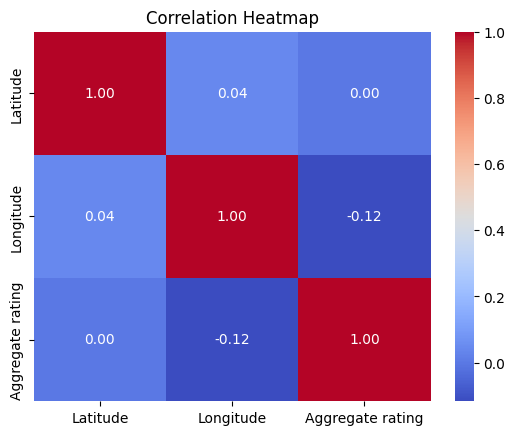

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Dataset .csv')

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(map)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

map.save('restaurants_map.html')

city_distribution = df['City'].value_counts()
country_distribution = df['Country Code'].value_counts()

print("\nDistribution of Restaurants Across Different Cities:")
print(city_distribution)

print("\nDistribution of Restaurants Across Different Countries:")
print(country_distribution)

correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation between Latitude, Longitude, and Aggregate rating:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# level-2
# task-1
Task: Table Booking and Online Delivery

Determine the percentage of restaurants that
offer table booking and online delivery.

Compare the average ratings of restaurants
with table booking and those without.

Analyze the availability of online delivery
among restaurants with different price ranges.

---



In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Dataset .csv')

total_restaurants = len(df)
table_booking_count = df['Has Table booking'].value_counts().get('Yes', 0)
online_delivery_count = df['Has Online delivery'].value_counts().get('Yes', 0)

percentage_table_booking = (table_booking_count / total_restaurants) * 100
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print("Percentage of restaurants that offer table booking: {:.2f}%".format(percentage_table_booking))
print("Percentage of restaurants that offer online delivery: {:.2f}%".format(percentage_online_delivery))

average_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("\nAverage rating of restaurants with table booking: {:.2f}".format(average_rating_with_booking))
print("Average rating of restaurants without table booking: {:.2f}".format(average_rating_without_booking))

price_ranges = [(0, 10), (11, 20), (21, 30), (31, 50), (51, 100)]
for price_range in price_ranges:
    min_price, max_price = price_range
    restaurants_in_range = df[(df['Average Cost for two'] >= min_price) & (df['Average Cost for two'] <= max_price)]
    online_delivery_percentage = (restaurants_in_range['Has Online delivery'].value_counts().get('Yes', 0) / len(restaurants_in_range)) * 100
    print("\nPrice Range: ${}-{}".format(min_price, max_price))
    print("Percentage of restaurants with online delivery: {:.2f}%".format(online_delivery_percentage))


Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56

Price Range: $0-10
Percentage of restaurants with online delivery: 0.00%

Price Range: $11-20
Percentage of restaurants with online delivery: 0.00%

Price Range: $21-30
Percentage of restaurants with online delivery: 0.00%

Price Range: $31-50
Percentage of restaurants with online delivery: 1.01%

Price Range: $51-100
Percentage of restaurants with online delivery: 4.57%


# task-2
Task: Price Range Analysis

Determine the most common price range
among all the restaurants.

Calculate the average rating for each price
range.

Identify the color that represents the highest
average rating among different price ranges.

---



In [ ]:
import pandas as pd

data = {
    'price_range': ['$', '$$', '$$', '$$$', '$', '$$$', '$$', '$', '$$$', '$'],
    'rating': [4.0, 4.5, 3.8, 4.2, 3.9, 4.7, 4.1, 3.5, 4.6, 3.8],
    'color': ['green', 'blue', 'blue', 'red', 'green', 'red', 'blue', 'green', 'red', 'green']
}

df = pd.DataFrame(data)

# Determine the most common price range
most_common_price_range = df['price_range'].mode()[0]

# Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('price_range')['rating'].mean()

# Identify the color representing the highest average rating
representative_color = df.groupby('price_range')['color'].first()
color_with_highest_avg_rating = average_rating_by_price_range.idxmax()
highest_avg_rating_color = representative_color[color_with_highest_avg_rating]

# Output the results
print("Most common price range:", most_common_price_range)
print("Average rating by price range:")
print(average_rating_by_price_range)
print("Color with the highest average rating:", highest_avg_rating_color)


Most common price range: $
Average rating by price range:
price_range
$      3.800000
$$     4.133333
$$$    4.500000
Name: rating, dtype: float64
Color with the highest average rating: red


# task-3
Task: Feature Engineering

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

---



In [ ]:
import pandas as pd
data = {
    'price_range': ['$', '$$', '$$', '$$$', '$', '$$$', '$$', '$', '$$$', '$'],
    'rating': [4.0, 4.5, 3.8, 4.2, 3.9, 4.7, 4.1, 3.5, 4.6, 3.8],
    'color': ['green', 'blue', 'blue', 'red', 'green', 'red', 'blue', 'green', 'red', 'green'],
    'restaurant_name': ['Aroma', 'Bistro Cafe', 'Chopsticks', 'Deluxe Dine', 'Eatery', 'Fine Feast', 'Gourmet Hub', 'Home Treats', 'Ivy Lounge', 'Joy Kitchen'],
    'address': ['123 Main St', '456 Elm St', '789 Oak St', '101 Maple Ave', '202 Pine Rd', '303 Birch Blvd', '404 Cedar St', '505 Spruce Ln', '606 Walnut Ave', '707 Ash Dr'],
    'has_table_booking': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'has_online_delivery': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Determine the most common price range
most_common_price_range = df['price_range'].mode()[0]

# Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('price_range')['rating'].mean()

# Identify the color representing the highest average rating
representative_color = df.groupby('price_range')['color'].first()
color_with_highest_avg_rating = average_rating_by_price_range.idxmax()
highest_avg_rating_color = representative_color[color_with_highest_avg_rating]

# Extract additional features
# Length of the restaurant name
df['name_length'] = df['restaurant_name'].apply(len)
# Length of the address
df['address_length'] = df['address'].apply(len)

# Encode 'Has Table Booking'
df['has_table_booking_encoded'] = df['has_table_booking'].apply(lambda x: 1 if x == 'Yes' else 0)
# Encode 'Has Online Delivery'
df['has_online_delivery_encoded'] = df['has_online_delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Output the results
print("Most common price range:", most_common_price_range)
print("Average rating by price range:")
print(average_rating_by_price_range)
print("Color with the highest average rating:", highest_avg_rating_color)
print("DataFrame with new features:")
print(df)


Most common price range: $
Average rating by price range:
price_range
$      3.800000
$$     4.133333
$$$    4.500000
Name: rating, dtype: float64
Color with the highest average rating: red
DataFrame with new features:
  price_range  rating  color restaurant_name         address  \
0           $     4.0  green           Aroma     123 Main St   
1          $$     4.5   blue     Bistro Cafe      456 Elm St   
2          $$     3.8   blue      Chopsticks      789 Oak St   
3         $$$     4.2    red     Deluxe Dine   101 Maple Ave   
4           $     3.9  green          Eatery     202 Pine Rd   
5         $$$     4.7    red      Fine Feast  303 Birch Blvd   
6          $$     4.1   blue     Gourmet Hub    404 Cedar St   
7           $     3.5  green     Home Treats   505 Spruce Ln   
8         $$$     4.6    red      Ivy Lounge  606 Walnut Ave   
9           $     3.8  green     Joy Kitchen      707 Ash Dr   

  has_table_booking has_online_delivery  name_length  address_length  \
0   

# level-3
# task-1
Task: Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

---



Linear Regression:
MSE: 1.89, R2: 0.17

Decision Tree:
MSE: 2.25, R2: 0.01

Random Forest:
MSE: 1.53, R2: 0.33



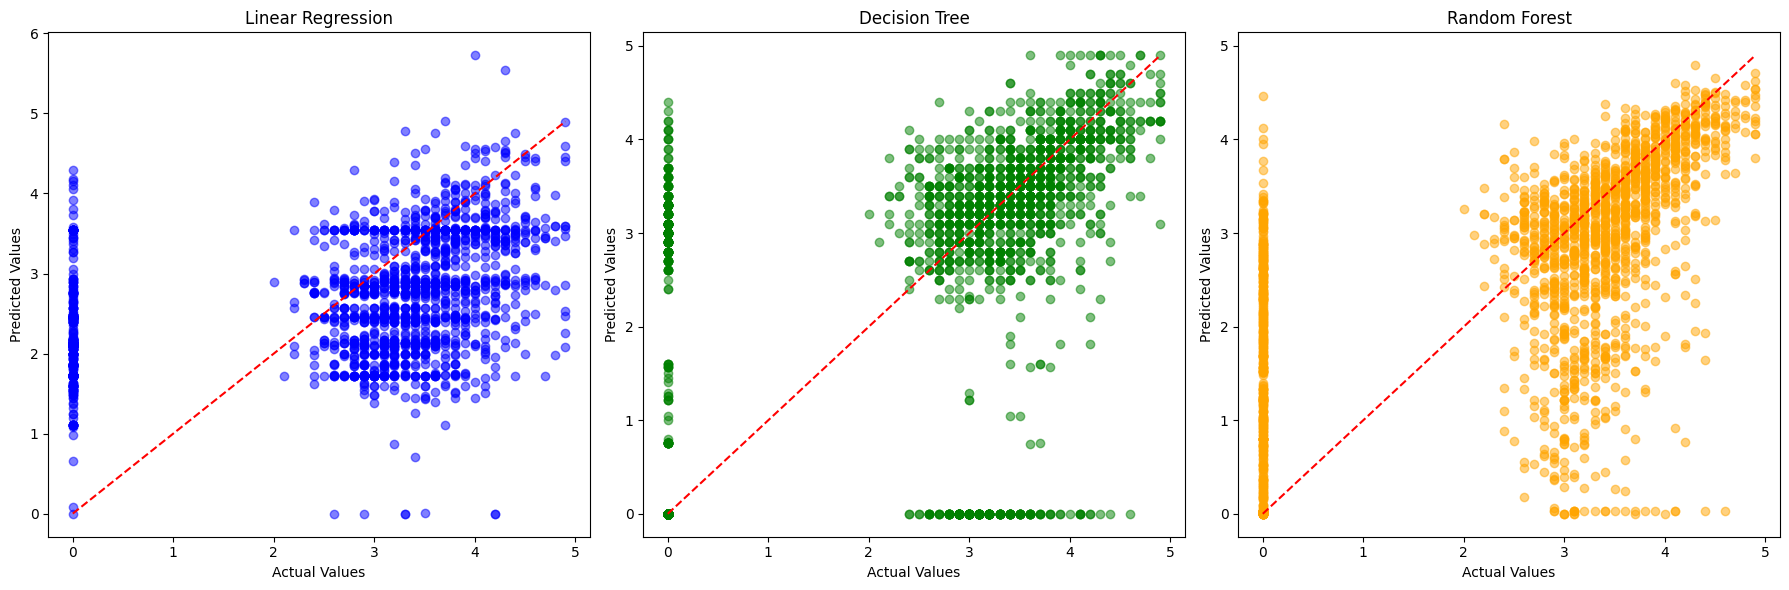

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
df = pd.read_csv("/content/sample_data/Dataset .csv")

# Preprocess the dataset
features = ['Cuisines', 'Longitude', 'Latitude']
target = 'Aggregate rating'

# Handle missing values for numeric features only
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df[column].fillna(df[column].median())

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the 'Cuisines' column and transform it
encoded_cuisines = encoder.fit_transform(df[['Cuisines']])

# Create a DataFrame from the encoded cuisines
encoded_cuisines_df = pd.DataFrame(encoded_cuisines, columns=encoder.get_feature_names_out(['Cuisines']))

# Concatenate the encoded cuisines with the original DataFrame
df = pd.concat([df, encoded_cuisines_df], axis=1)

# Update features to include the encoded cuisine columns
encoded_cuisine_cols = encoder.get_feature_names_out(['Cuisines']).tolist()
features = ['Longitude', 'Latitude'] + encoded_cuisine_cols

X = df[features]
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on test set
linear_preds = linear_model.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
decision_tree_r2 = r2_score(y_test, decision_tree_preds)

random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)

# Print results
print("Linear Regression:")
print(f"MSE: {linear_mse:.2f}, R2: {linear_r2:.2f}\n")

print("Decision Tree:")
print(f"MSE: {decision_tree_mse:.2f}, R2: {decision_tree_r2:.2f}\n")

print("Random Forest:")
print(f"MSE: {random_forest_mse:.2f}, R2: {random_forest_r2:.2f}\n")

# Plot predictions vs actual
plt.figure(figsize=(18, 6))

# Linear Regression plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_preds, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Decision Tree plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, decision_tree_preds, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Random Forest plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, random_forest_preds, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# task-2
Task: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines
that tend to receive higher ratings.

---



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/sample_data/Dataset .csv')

# Avearage cost for two mean and votes sum
cuisine_analysis = data.groupby('Cuisines').agg({'Average Cost for two': 'mean', 'Votes': 'sum'}).reset_index()
# Sort cuisines by popularity (votes) and by average
popular_cuisines = cuisine_analysis.sort_values(by='Votes', ascending=False)
high_rated_cuisines = cuisine_analysis.sort_values(by='Average Cost for two', ascending=False)

# Print the results
print("Most Popular Cuisines (by Votes):")
print(popular_cuisines.head())

print("\nCuisines with Highest Average Ratings:")
print(high_rated_cuisines.head())

# Save the results to a file if needed
popular_cuisines.to_csv('popular_cuisines.csv', index=False)
high_rated_cuisines.to_csv('high_rated_cuisines.csv', index=False)


Most Popular Cuisines (by Votes):
                   Cuisines  Average Cost for two  Votes
1514  North Indian, Mughlai            774.161677  53747
1306           North Indian            414.220085  46241
1329  North Indian, Chinese            625.538160  42012
331                    Cafe            562.591973  30657
497                 Chinese            551.045198  21925

Cuisines with Highest Average Ratings:
                        Cuisines  Average Cost for two  Votes
136   Asian, Indonesian, Western              800000.0    873
923              French, Western              350000.0    243
490                Cafe, Western              300000.0    458
1021                  Indonesian              300000.0    155
1782             Sushi, Japanese              250060.0    614


# task-3
Task: Data Visualization

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

Visualize the relationship between various
features and the target variable to gain insights.

---



<ipython-input-8-a5d0e06cf2a0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', data=data, palette='pastel')


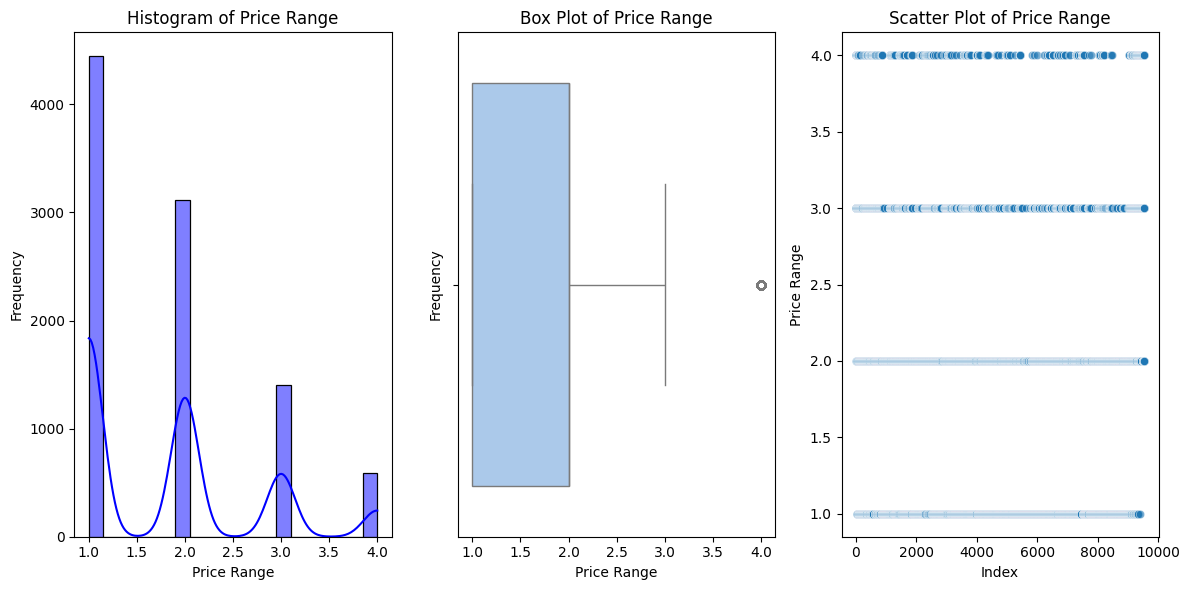

<ipython-input-8-a5d0e06cf2a0>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_avg.values, y=cuisine_avg.index, palette='viridis')


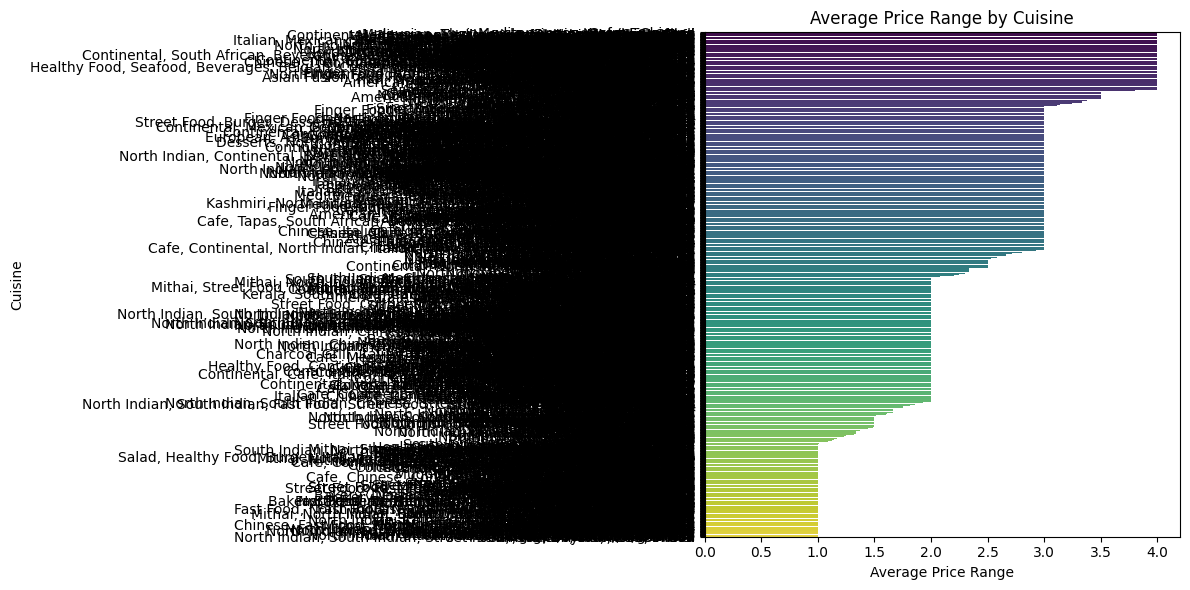

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/sample_data/Dataset .csv')

# Ensure necessary columns exist in the dataset
required_columns = {'Price range', 'Cuisines', 'City'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Dataset must contain {required_columns} columns.")

# 1. Distribution of Price Range
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data['Price range'], bins=20, kde=True, color='blue')
plt.title('Histogram of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='Price range', data=data, palette='pastel')
plt.title('Box Plot of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

# Scatter Plot
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x=range(len(data)), y='Price range', alpha=0.6)
plt.title('Scatter Plot of Price Range')
plt.xlabel('Index')
plt.ylabel('Price Range')

plt.tight_layout()
plt.show()
# 2. Compare the average Price Range by Cuisines
plt.figure(figsize=(12, 6))

# Average Price Range by Cuisine
cuisine_avg = data.groupby('Cuisines')['Price range'].mean().sort_values(ascending=False)

sns.barplot(x=cuisine_avg.values, y=cuisine_avg.index, palette='viridis')
plt.title('Average Price Range by Cuisine')
plt.xlabel('Average Price Range')
plt.ylabel('Cuisine')

plt.tight_layout()
plt.show()


